Regression Parameters (w vector):
 [ 1.12330469e+04 -7.60803117e+00 -7.44662703e+01 -1.30459393e+03
  4.57557121e+03  1.25789694e+02  4.70968296e+03  3.39735125e+01
  1.43972990e+04  1.38131032e+02 -6.94737226e+03  4.10027539e+02
  8.85555226e+00  9.82159966e+00  6.35822116e-01 -1.01230105e+03
  9.85302712e+01  4.29370675e+03]
R-squared value: 0.5867786725797813
Mean of residuals: 4.857673686538034e-09
Standard deviation of residuals: 27636.095662159776


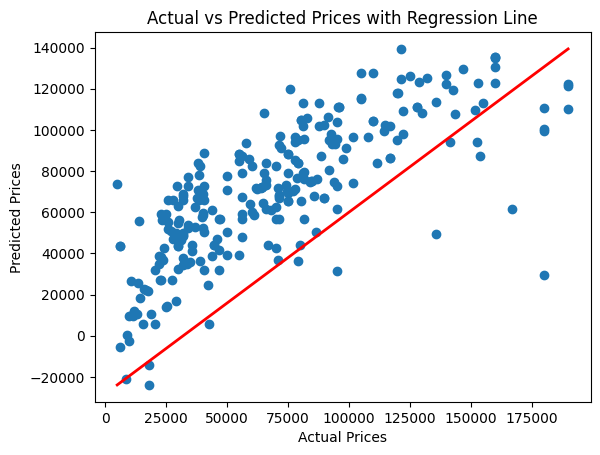

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\kleij\AppData\Local\Temp\ipykernel_13968\557968498.py:54: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kleij\AppData\Local\Temp\ipykernel_13968\557968498.py:54: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kleij\AppData\Local\Temp\ipykernel_13968\557968498.py:54: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kleij\AppData\Local\Temp\ipykernel_13

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data.csv')

# Extract features (X) and target variable (y), disregarding 'fc'
X = data.drop(['price', 'fc'], axis=1).copy()  # Exclude 'price' and 'fc' columns
y = data['price'].copy()  # Target variable ('price' column)

# Add a column of ones to X for the bias term
X['bias'] = 1

# Convert X and y to numpy arrays
X_matrix = X.values
y_vector = y.values

# Calculate regression parameters using the normal equation
N_matrix = np.transpose(X_matrix).dot(X_matrix)
y_vector_right = np.transpose(X_matrix).dot(y_vector)
w_vector = np.linalg.inv(N_matrix).dot(y_vector_right)

print('Regression Parameters (w vector):\n', w_vector)

# Make predictions
predictions = X_matrix.dot(w_vector)

# Calculate the R-squared value
ssr = np.sum((predictions - np.mean(y_vector))**2)
sst = np.sum((y_vector - np.mean(y_vector))**2)
r_squared = ssr / sst

print('R-squared value:', r_squared)

# Statistical analysis
residuals = y_vector - predictions
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print('Mean of residuals:', mean_residual)
print('Standard deviation of residuals:', std_residual)

# Plot actual vs predicted prices with regression line
plt.scatter(y_vector, predictions)
plt.plot([min(y_vector), max(y_vector)], [min(predictions), max(predictions)], color='red', linestyle='-', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Regression Line (excluding fc)')
plt.show()
